# California Housing Dataset

In [1]:
import sys
import pandas as pd
import numpy as np

import tensorflow as tf
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
sns.set_context("paper")

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

## Creating the model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20

363/363 [==============================] - 1s 1ms/step - loss: 2.5936 - val_loss: 1.3857
Epoch 2/20
363/363 [==============================] - 0s 850us/step - loss: 0.9372 - val_loss: 0.8248
Epoch 3/20
363/363 [==============================] - 0s 935us/step - loss: 0.7719 - val_loss: 0.8406
Epoch 4/20
363/363 [==============================] - 0s 855us/step - loss: 0.7158 - val_loss: 0.7405
Epoch 5/20
363/363 [==============================] - 0s 915us/step - loss: 0.6751 - val_loss: 0.6805
Epoch 6/20
363/363 [==============================] - 0s 940us/step - loss: 0.6406 - val_loss: 0.6627
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6114 - val_loss: 0.6583
Epoch 8/20
363/363 [==============================] - 0s 885us/step - loss: 0.5859 - val_loss: 0.5942
Epoch 9/20
363/363 [==============================] - 0s 917us/step - loss: 0.5631 - val_loss: 0.5884
Epoch 10/20
363/363 [==============================] - 0s 840us/step - loss: 0.5434 

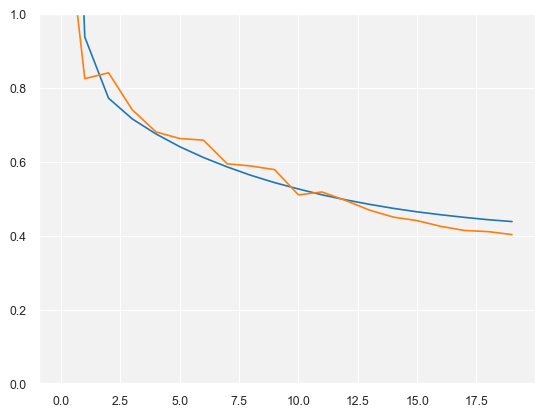

In [5]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [6]:
y_pred

array([[0.8519938],
       [1.5861828],
       [3.190826 ]], dtype=float32)